<a href="https://colab.research.google.com/github/vipingupta1907/2011MT22_CS575/blob/main/CS575_MidSem_solution/A2_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution for Dataset2

In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, Holt, SimpleExpSmoothing)
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#importing the dataset

D2 = pd.read_csv("Dataset2_month_temp.csv", names = ["actual"])
D2.head()

,actual
0,0.24
1,0.46
2,0.31
3,0.33
4,0.27


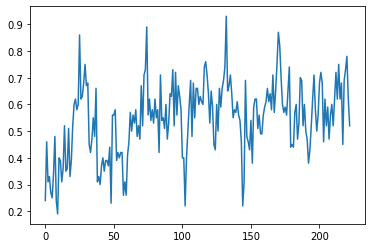

In [ ]:
plt.plot(D2['actual'])

#KPSS Test

In [ ]:
#define function for kpss test

from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = D2[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('actual')

Results of KPSS Test for  actual
Test Statistic            0.664381
p-value                   0.016784
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


>For the given dataset D2 , the value of the test statistic is greater than the critical value at all confidence intervals in the KPSS test, hence the series is non stationary.

#ADF Test

In [ ]:
#define function for ADF test

from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    timeseries = D2[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test('actual')

Results of Dickey-Fuller Test for  actual 

Test Statistic                  -4.044912
p-value                          0.001193
#Lags Used                       3.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64


>For the given dataset D2 , the value of the test statistic is greater than the critical value at all confidence intervals in the ADF test, hence  the series is non stationary.


**Since, both tests conclude that the series is non stationary, therefore, the dataset is concluded as Non Stationary.**

# making non stationary series to stationary

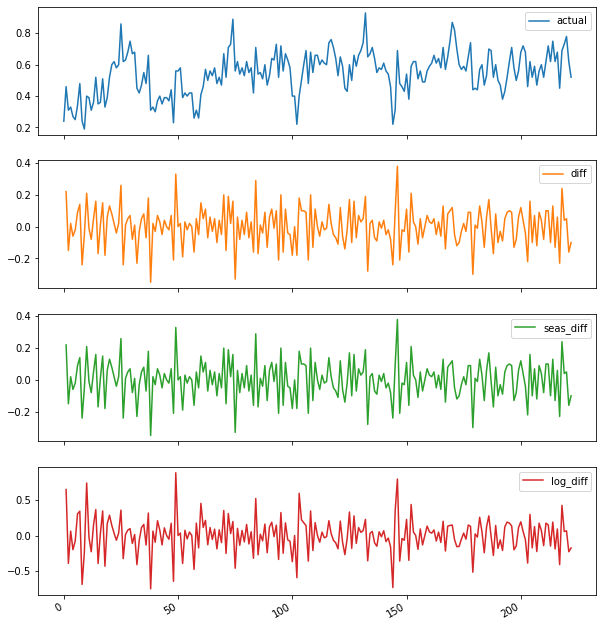

In [ ]:
# Differencing
D2['diff'] = D2['actual'].diff(periods=1)

# Seasonal Differencing
D2['seas_diff'] = D2['actual'].diff(periods=1)

# Transformation (here we use log transformation)
D2_log = np.log(D2['actual'])
D2['log_diff'] = D2_log.diff(periods=1)

D2.plot(subplots=True, figsize=(10,12))
plt.show()



> From the above plot we can visiualise that coloumn log_diff is stationary series




In [ ]:
data = D2['actual']

#Single Exponential Smoothing

In [ ]:
#Defining function for calling data values with interval 'n'

def data_n(arr,interval):
  arr1=[arr[0]]
  for i in range(1,len(arr)):
    if i%interval==0:  
      arr1.append(arr[i])
  return arr1

In [ ]:
#Defining single Exponential Smoothing function with interval 

def single_exponential_smoothing(arr, alpha, interval):
  arr1 = [arr[0]]
  j=1
  for i in range(1, len(arr)):
    if i%interval == 0:
      arr1.append(alpha*arr[i-1] + (1-alpha)*arr1[j-1])
      j+=1
  return arr1

In [ ]:
#Calculating mean square error function for single exponential smoothing 

def MSE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE


In [ ]:
#Calculating mean absolute error function for single exponential smoothing 

def MAE_SES(arr, alpha, interval):
  Y_true = data_n(arr, interval)
  Y_pred = single_exponential_smoothing(arr, alpha, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE


In [ ]:
#calculating mean square error for different combinations of alpha for single exponential smoothing

print("MSE for alpha =.4 is  " ,MSE_SES(data, .4, interval=1), "\n")
print("MSE for alpha =.35 is " ,MSE_SES(data, .35, interval=2), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=4), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=8), "\n")
print("MSE for alpha =.65 is " ,MSE_SES(data, .65, interval=12), "\n")
print("MSE for alpha =.85 is " ,MSE_SES(data, .85, interval=24), "\n")

MSE for alpha =.4 is   0.011776981898557937 

MSE for alpha =.35 is  0.015410863847598646 

MSE for alpha =.65 is  0.014797060339055309 

MSE for alpha =.85 is  0.014903517770104627 

MSE for alpha =.65 is  0.024733771058052707 

MSE for alpha =.85 is  0.02227065793019092 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_SES(data, .4 ,interval=1), "\n")
print("MAE  is " ,MAE_SES(data, .4  ,interval=2), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=4), "\n")
print("MAE  is " ,MAE_SES(data,.4  , interval=8), "\n")
print("MAE  is " ,MAE_SES(data,.4  ,interval=12), "\n")
print("MAE  is " ,MAE_SES(data,.4 ,interval=24), "\n")

MAE  is  0.08735628371160788 

MAE  is  0.09840658525296796 

MAE  is  0.10592783103222822 

MAE  is  0.0952714445599397 

MAE  is  0.12875944694602587 

MAE  is  0.139642051584 



#Double Exponential Smoothing

In [ ]:
#Defining Double Exponential Smoothing function double_exponential_smoothing with interval 


def double_exponential_smoothing(arr,alpha,beta,interval):
  a=[arr[0]]
  l=len(arr)
  b=[(arr[l-1]-arr[0])/(l-1)]
  arr1 = [arr[0]]
  j=0
  for i in range(1,len(arr)):
      if i%interval==0:
        arr1.append(a[j]+b[j])
        j+=1
        a.append(alpha * arr[i] + (1 - alpha) * (a[j-1]+b[j-1]))
        b.append(beta * (a[j]-a[j-1]) + (1 - beta) * (b[j-1]))        
  return arr1

In [ ]:
#Calculating mean square error function for double exponential smoothing 

def MSE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for double exponential smoothing 

def MAE_DES(arr, alpha,beta,interval):
  Y_true = data_n(arr, interval)
  Y_pred = double_exponential_smoothing(arr, alpha,beta, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta for double exponential smoothing 

print("MSE for alpha =.4,  beta = .2  is " ,MSE_DES(data, .4, .2 ,interval=1), "\n")
print("MSE for alpha =.35, beta = .5  is " ,MSE_DES(data, .35, .5, interval=2), "\n")
print("MSE for alpha =.85, beta = .6  is " ,MSE_DES(data, .85, .6 ,interval=4), "\n")
print("MSE for alpha =.45, beta = .6  is " ,MSE_DES(data, .45, .6 ,interval=8), "\n")
print("MSE for alpha =.7,  beta = .55 is " ,MSE_DES(data, .7, .55, interval=12), "\n")
print("MSE for alpha =.2,  beta = .6  is " ,MSE_DES(data, .2, .6 ,interval=24), "\n")


MSE for alpha =.4,  beta = .2  is  0.013559459507564531 

MSE for alpha =.35, beta = .5  is  0.0198909933264101 

MSE for alpha =.85, beta = .6  is  0.028528711470156395 

MSE for alpha =.45, beta = .6  is  0.030247167512075585 

MSE for alpha =.7,  beta = .55 is  0.07413718913449525 

MSE for alpha =.2,  beta = .6  is  0.05337275056351644 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=1), "\n")
print("MAE  is " ,MAE_DES(data, .4, .2 ,interval=2), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=4), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 , interval=8), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=12), "\n")
print("MAE  is " ,MAE_DES(data,.4, .2 ,interval=24), "\n")

MAE  is  0.09485271707529382 

MAE  is  0.10543857382392995 

MAE  is  0.11462954949592284 

MAE  is  0.1132565882562978 

MAE  is  0.16048640611134476 

MAE  is  0.1919332814007883 



#Triple Exponential Smoothing

In [ ]:
#Defining Triple Exponential Smoothing function double_exponential_smoothing with interval 

def initial_trend(data, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(data[i+slen] - data[i]) / slen
    return sum / slen

def initial_seasonal_components(data, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(data)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(data[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += data[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(data, slen, alpha, beta, gamma, interval):
    data2 = data_n(data,interval)
    result = []
    seasonals = initial_seasonal_components(data2, slen)
    for i in range(len(data2)):
        if i == 0: 
            smooth = data2[0]
            trend = initial_trend(data2, slen)
            result.append(data2[0])
            continue
        if i >= len(data2): 
            m = i - len(data2) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = data2[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [ ]:
#Calculating mean square error function for Triple exponential smoothing 

def MSE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
  return MSE

In [ ]:
#Calculating mean absolute error function for Triple exponential smoothing 

def MAE_TES(arr,slen, alpha,beta,gamma, interval):
  Y_true = data_n(arr, interval)
  Y_pred = triple_exponential_smoothing(arr,slen , alpha,beta, gamma, interval)
  MAE = abs(np.subtract(Y_true,Y_pred)).mean() 
  return MAE

In [ ]:
#calculating mean square error for different combinations of alpha, beta, gamma for triple exponential smoothing

print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MSE for alpha =.35, beta = .5,  gamma = .3  is " ,MSE_TES(data,1, .35, .5, .3, interval=2), "\n")
print("MSE for alpha =.45, beta = .6,  gamma = .4  is " ,MSE_TES(data,1, .45, .6, .4 ,interval=4), "\n")
print("MSE for alpha =.4,  beta = .2,  gamma = .5  is " ,MSE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=12), "\n")
print("MSE for alpha =.3,  beta = .5,  gamma = .55 is " ,MSE_TES(data,1, .3, .5, .55, interval=24), "\n")


MSE for alpha =.4,  beta = .2,  gamma = .5  is  0.0029221888844665036 

MSE for alpha =.35, beta = .5,  gamma = .3  is  0.0034245879975989962 

MSE for alpha =.45, beta = .6,  gamma = .4  is  0.0025193095934351113 

MSE for alpha =.4,  beta = .2,  gamma = .5  is  0.0018054388709257238 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  0.005841167508021667 

MSE for alpha =.3,  beta = .5,  gamma = .55 is  0.06560392192574516 



In [ ]:
#calculating mean Absolute error after aplying different combinations
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=1), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=2), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=4), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=8), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=12), "\n")
print("MAE  is " ,MAE_TES(data,1, .4, .2 , .5,interval=24), "\n")

MAE  is  0.033737598146580096 

MAE  is  0.032716280686176456 

MAE  is  0.03259887007489653 

MAE  is  0.033851690339717584 

MAE  is  0.06229166177661675 

MAE  is  0.28932065000961704 



# AR

In [ ]:
#fit model
model=ARIMA(D2['log_diff'].dropna(), order=(2,0,0))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D2['forecast1'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:               log_diff   No. Observations:                  222
Model:                     ARMA(1, 0)   Log Likelihood                   9.073
Method:                       css-mle   S.D. of innovations              0.232
Date:                Mon, 01 Mar 2021   AIC                            -12.146
Time:                        05:26:56   BIC                             -1.938
Sample:                             0   HQIC                            -8.025
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0029      0.011      0.255      0.799      -0.020       0.025
ar.L1.log_diff    -0.3636      0.063     -5.726      0.000      -0.488      -0.239
                                    

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D2['log_diff'],D2['forecast1'])).mean() 
print("MSE for AR is", MSE)

MSE for AR is 0.05416974483038222


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D2['log_diff'],D2['forecast1'])).mean() 
print("MAE for AR is", MAE)


MAE for AR is 0.17470953122089905


# MA

In [ ]:
#fit model
model=ARIMA(D2['log_diff'].dropna(), order=(3,0,1))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D2['forecast2'] = model_fit.predict()

                              ARMA Model Results                              
Dep. Variable:               log_diff   No. Observations:                  222
Model:                     ARMA(0, 1)   Log Likelihood                  17.991
Method:                       css-mle   S.D. of innovations              0.223
Date:                Mon, 01 Mar 2021   AIC                            -29.981
Time:                        05:26:56   BIC                            -19.773
Sample:                             0   HQIC                           -25.860
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0031      0.006      0.499      0.617      -0.009       0.015
ma.L1.log_diff    -0.5877      0.068     -8.602      0.000      -0.722      -0.454
                                    

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D2['log_diff'],D2['forecast2'])).mean() 
print("MSE for MR is", MSE)

MSE for MR is 0.05018709243465605


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D2['log_diff'],D2['forecast2'])).mean() 
print("MAE for MR is", MAE)


MAE for MR is 0.17205901645599175


# ARIMA

In [ ]:
#fit model
model=ARIMA(D2['actual'].dropna(), order=(2,0,3))
model_fit=model.fit()

#model summary
print(model_fit.summary())

#make prediction
D2['forecast3'] = model_fit.predict()

                             ARIMA Model Results                              
Dep. Variable:               D.actual   No. Observations:                  222
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 180.106
Method:                       css-mle   S.D. of innovations              0.107
Date:                Mon, 01 Mar 2021   AIC                           -352.212
Time:                        05:26:57   BIC                           -338.601
Sample:                             1   HQIC                          -346.717
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0014      0.002      0.662      0.508      -0.003       0.006
ar.L1.D.actual     0.3072      0.151      2.041      0.041       0.012       0.602
ma.L1.D.actual    -0.8002      0.114

In [ ]:
#Calculating mean square error function 
MSE = np.square(np.subtract(D2['log_diff'],D2['forecast3'])).mean() 
print("MSE for ARIMA is", MSE)

MSE for ARIMA is 0.05126363384567146


In [ ]:
#Calculating mean absolute error function 
MAE = abs(np.subtract(D2['log_diff'],D2['forecast3'])).mean() 
print("MAE for ARIMA is", MAE)


MAE for ARIMA is 0.17168388481348437


# Optimal model check by auto arima

In [ ]:
!pip3 install pmdarima
import pmdarima as pm

In [ ]:
model = pm.auto_arima(D2.iloc[:,0], start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True,stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-348.834, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=377.837, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-305.484, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=164.742, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-350.560, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-337.521, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-355.547, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-356.991, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-347.901, Time=0.35 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-354.965, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-355.692, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-363.650, Time=0.66 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-363.197, Time=0.66 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AI

so best optimal model is ARIMA(2,0,3)

# table

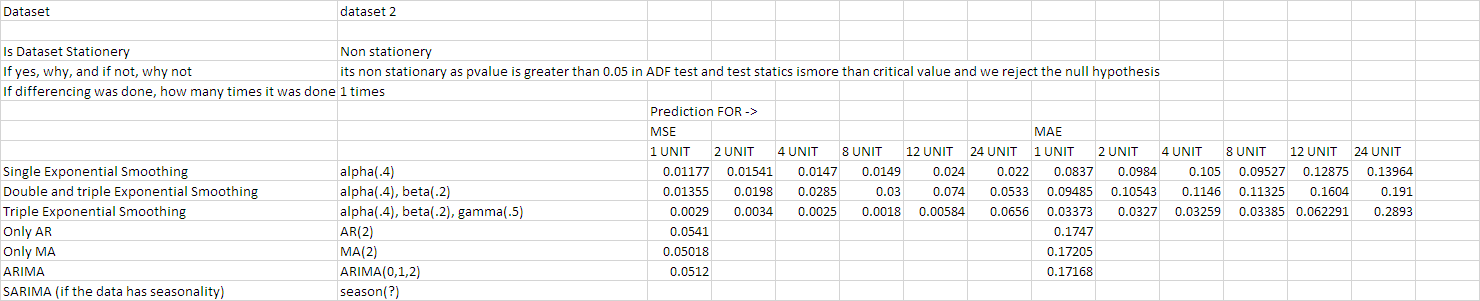